## Tanzanian Demands

In this notebook, we will be exploring demand elasticities and demand curves for particular goods. For more information or explanation, visit: https://docs.google.com/document/d/1axeQE59q7xzmWjjw1biYJoxv_EyFVNwoIqkZpNPVlqs/edit#

In [3]:
!pip install CFEDemands --upgrade
!pip install xarray
import cfe
import pandas as pd
import numpy as np

Requirement already up-to-date: CFEDemands in /srv/app/venv/lib/python3.6/site-packages


### CFEDemands: Result Object

The CFEDemands module allows us to use a "Result" object. Uncomment the cell below to read provided documentation.

In [4]:
#cfe.Result?

An instance `r` of `cfe.Result` can be made persistent with
`r.to_dataset('my_result.ds')`, which saves the instance &ldquo;on disk&rdquo; in
[NetCDF format](https://en.wikipedia.org/wiki/NetCDF), and can be loaded using `cfe.from_dataset`.  We use
this method below to load data and demand system estimated for the
sampled Tanzanian households:



In [2]:
#Replace the string assignment for FILE_LOCATION with the file directory for tanzanian_nps.ds. This will 
#allow you to use the Result object that contains necessary information to calculate demand for Tanzania.

FILE_LOCATION = 'TanzanianNPS/tanzanian_nps.ds'
r = cfe.from_dataset(FILE_LOCATION)
r

<xarray.Result>
Dimensions:           (i: 36, j: 13562, k: 8, kp: 8, m: 1, t: 4)
Coordinates:
  * j                 (j) object '0001-001' '0002-001' ... '905012325008102'
  * i                 (i) object 'Beef Including Minced Sausage' ... 'Yams/Cocoyams'
  * k                 (k) object 'C 0-2' 'C 2-5' 'C 6-9' ... 'Women' 'log HSize'
  * kp                (kp) object 'C 0-2' 'C 10-14' ... 'Women' 'log HSize'
  * t                 (t) int32 2008 2010 2012 2014
  * m                 (m) int32 1
Data variables:
    alpha             (i) float64 7.48 6.734 6.482 6.133 ... 4.978 5.052 6.358
    beta              (i) float64 1.213 1.286 1.002 1.239 ... 1.538 0.5749 0.806
    delta             (k, i) float64 ...
    prices            (i, t, m) float64 2.6e+03 3e+03 3.067e+03 ... 1.101 1.25
    characteristics   (k, j, t, m) float64 nan nan 0.0 nan ... nan 0.0 nan nan
    loglambdas        (j, t, m) float64 ...
    a                 (i, t, m) float64 ...
    yhat              float64 ...
    

### Parameters

Our focus earlier was on estimation, but the result `r` already has
encoded in it the results of that estimation.

There are parameters $\alpha$:



In [5]:
r.get_alpha(as_df=True)

i
Beef Including Minced Sausage                               7.479798
Bottled/Canned Soft Drinks (Soda, Juice, Water)             6.734000
Bread                                                       6.482336
Buns, Cakes And Biscuits                                    6.133450
Cassava Fresh                                               6.026506
Chicken And Other Poultry                                   7.711807
Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)            5.681213
Coconuts (Mature/Immature)                                  6.467604
Cooking Bananas, Plantains                                  6.325288
Cooking Oil                                                 6.251762
Dried/Salted/Canned Fish And Seafood (Incl. Dagaa)          6.404280
Eggs                                                        6.462157
Fresh Fish And Seafood (Including Dagaa)                    6.792584
Fresh Milk                                                  6.475967
Goat Meat                       

Elasticity parameters $\beta$:



In [6]:
r.get_beta(as_df=True)

i
Beef Including Minced Sausage                               1.213233
Bottled/Canned Soft Drinks (Soda, Juice, Water)             1.286109
Bread                                                       1.001697
Buns, Cakes And Biscuits                                    1.239239
Cassava Fresh                                               0.716144
Chicken And Other Poultry                                   0.997224
Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)            1.724716
Coconuts (Mature/Immature)                                  0.901919
Cooking Bananas, Plantains                                  1.165029
Cooking Oil                                                 1.286237
Dried/Salted/Canned Fish And Seafood (Incl. Dagaa)          1.130935
Eggs                                                        1.055304
Fresh Fish And Seafood (Including Dagaa)                    1.601109
Fresh Milk                                                  1.654788
Goat Meat                       

And parameters related to household characteristics $\delta$:

$\delta$s in the dataframe below demonstrate how quantity demanded of particulari items vary with changing household characteristics. Note that in this case, characteristics are broken down into age for children, sex for adults, and overall household size. The correct interpretation of the final column is:

"If household size increases by 1, quantity demanded of Beef Including Minced Sausage will increase by 28.7116%."

In [7]:
r.delta.to_dataframe().unstack('k')

delta            \
k                                                      C 0-2   C 10-14   
i                                                                        
Beef Including Minced Sausage                      -0.073840 -0.009354   
Bottled/Canned Soft Drinks (Soda, Juice, Water)    -0.110171  0.011356   
Bread                                              -0.063439  0.061496   
Buns, Cakes And Biscuits                           -0.137101 -0.045781   
Cassava Fresh                                      -0.101534  0.058834   
Chicken And Other Poultry                          -0.084434 -0.001241   
Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)   -0.110621 -0.006674   
Coconuts (Mature/Immature)                          0.077160  0.034416   
Cooking Bananas, Plantains                         -0.119571  0.023085   
Cooking Oil                                        -0.077055 -0.011671   
Dried/Salted/Canned Fish And Seafood (Incl. Dagaa)  0.029089  0.057339   
Eggs                                               -0.129918 -0.028372   
Fresh Fish And Seafood (Including Dagaa)           -0.078255 -0.019806   
Fresh Milk                                         -0.011722 -0.042190   
Goat Meat                                          -0.038121  0.026644   
Groundnuts In Shell/Shelled                         0.018725  0.067784   
Honey, Syrups, Jams, Marmalade, Jellies, Canned... -0.092751 -0.036592   
Irish Potatoes                                     -0.046358 -0.001069   
Macaroni, Spaghetti                                 0.075484  0.111125   
Maize (Flour)                                      -0.058619  0.025145   
Mangoes, Avocadoes And Other Fruits                -0.153958 -0.081504   
Milk Products (Like Cream, Cheese, Yoghurt Etc)    -0.016043 -0.035447   
Millet And Sorghum (Flour)                         -0.048159  0.088875   
Onions, Tomatoes, Carrots And Green Pepper, Oth... -0.108622 -0.053861   
Other Spices                                       -0.085138 -0.052510   
Peas, Beans, Lentils And Other Pulses              -0.053746  0.059298   
Rice (Husked)                                      -0.082004  0.013674   
Ripe Bananas                                       -0.097796 -0.030588   
Salt                                                0.031451  0.034461   
Spinach, Cabbage And Other Green Vegetables        -0.122450 -0.025277   
Sugar                                              -0.040786  0.023971   
Sugarcane                                          -0.160332  0.028215   
Sweet Potatoes                                      0.024932  0.027570   
Sweets                                             -0.074007 -0.039619   
Tea Dry                                            -0.056301  0.008933   
Yams/Cocoyams                                       0.045950  0.043725   

                                                                        \
k                                                    C 15-17     C 2-5   
i                                                                        
Beef Including Minced Sausage                       0.049567 -0.065232   
Bottled/Canned Soft Drinks (Soda, Juice, Water)     0.063397 -0.104918   
Bread                                               0.110984  0.023626   
Buns, Cakes And Biscuits                            0.047703 -0.099702   
Cassava Fresh                                       0.042987  0.011338   
Chicken And Other Poultry                           0.067517 -0.050566   
Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)   -0.035268 -0.040138   
Coconuts (Mature/Immature)                          0.074361  0.052178   
Cooking Bananas, Plantains                          0.016822 -0.109062   
Cooking Oil                                         0.014011 -0.068993   
Dried/Salted/Canned Fish And Seafood (Incl. Dagaa)  0.037695 -0.004870   
Eggs                                                0.130577 -0.044665   
Fresh Fish And Seafood (Including Dagaa)            0.0232

The triple of paramters $(\alpha,\beta,\delta)$ completely describes
the demand system and the corresponding utility function (over the
goods we observe).



## Prices & Marshallian Demands



As mentioned above, we&rsquo;ve estimated the parameters of a Frischian
demand system (demands that depend on prices and the households
marginal utility of expenditures).  But we can *compute* the
corresponding Marshallian (depends on prices and budget) or Hicksian
(depends on prices and the level of utility) demands for this same
population, using the `cfe.Result.demands` method.  

Let&rsquo;s compute Marshallian demands.  Start with a choice of budget $x$
and prices.  We&rsquo;ll use aggregated prices from 2014.



In [4]:
x = 6311 # 50th percentile daily budget for food expenditures in this survey sample.

# Note selection of prices for 2014 (importing given data)
p = r.prices.sel(t=2014).copy()

# Price data override with dedicated market price & imputed consumption expenditure prics.
newp = pd.read_csv('our-prices.csv')
arr_of_arrs = np.empty((36, 1), dtype=float)
for i in np.arange(0, 36):
    arr_of_arrs[i] = newp.iloc[:,0].values[i]
p.values = arr_of_arrs

p.to_dataframe().squeeze()

,,t,prices
i,m,,
Beef Including Minced Sausage,1,2014,727.631976
"Bottled/Canned Soft Drinks (Soda, Juice, Water)",1,2014,168.780000
Bread,1,2014,94.307356
"Buns, Cakes And Biscuits",1,2014,128.455187
Cassava Fresh,1,2014,17.459839
Chicken And Other Poultry,1,2014,269.175871
"Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)",1,2014,34.875315
Coconuts (Mature/Immature),1,2014,189.973566
"Cooking Bananas, Plantains",1,2014,235.877942


Now compute demands.  The object `r` already knows what the estimated
parameters are, and uses those automatically:



In [10]:
#This is our C, or quantities demanded given a budget x, and a set of prices p. Note that prices are per
#100 grams of the particular good. Therefore, to get the quantity demanded of an item like Beef Including
#Minced Sausage, we would do 0.668994 * 100g = 66.8994g demanded given a budget of 6,311 TZS.

r.demands(x,p)

i                                                         m
Beef Including Minced Sausage                             1    0.668994
Bottled/Canned Soft Drinks (Soda, Juice, Water)           1    1.638789
Bread                                                     1    2.045531
Buns, Cakes And Biscuits                                  1    1.072576
Cassava Fresh                                             1    4.027293
Chicken And Other Poultry                                 1    2.441531
Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)          1    4.788496
Coconuts (Mature/Immature)                                1    0.999447
Cooking Bananas, Plantains                                1    0.657926
Cooking Oil                                               1    0.158313
Dried/Salted/Canned Fish And Seafood (Incl. Dagaa)        1    0.267142
Eggs                                                      1    0.520003
Fresh Fish And Seafood (Including Dagaa)                  1    0.500396
Fres

So we can compute demands.  Let&rsquo;s trace out a demand curve for Millet And Sorghum (Flour). Note that the item you select must match up exactly (case-sensitive) to the name of a good in the code block executed above. For example, 'millet and sorghum' will not work by itself, rahter it must be 'Millet And Sorghum (Flour)'. 



5% of budget 3927.9419520547945 is: 196.39709760273973
5% of budget 6311.826369863014 is: 315.5913184931507
5% of budget 9838.717294520548 is: 491.9358647260274


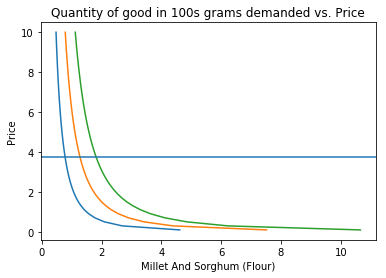

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Values for millet & sorghum prices
P = np.linspace(0.1,10,50) #Returns an array starting at 0.1 and going up to 10 with 50 identical distances separating the values.

def my_prices(p0,p=p):
    p.loc['Millet And Sorghum (Flour)'] = p0
    return p

#Note that we are taking 5% of the 25th, 50th, and 75th percentile of daily food expenditures for households in Tanzania.
for x in [(3927.9419520547945*.05),(6311.8263698630135*.05),(9838.717294520548*.05)]:
    print('5% of budget', x*20, 'is:', x) #Assuming 5% of the total food budget is spent on this specific good.
    plt.plot([r.demands(x,my_prices(p0))['Millet And Sorghum (Flour)'].values[0] for p0 in P],P)

plt.title('Quantity of good in 100s grams demanded vs. Price');
plt.xlabel('Millet And Sorghum (Flour)');
plt.axhline(3.744) #Current market price of 100g of Millet And Sorghum (Flour)
plt.ylabel('Price');

5% of budget 3927.9419520547945 is: 196.39709760273973
5% of budget 6311.826369863014 is: 315.5913184931507
5% of budget 9838.717294520548 is: 491.9358647260274


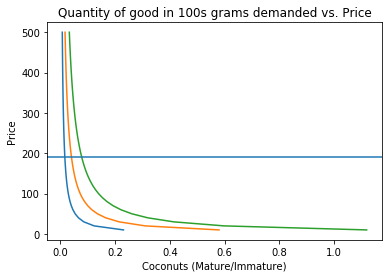

In [7]:
# Values for coconut prices
P = np.linspace(10,500,50) #Returns an array starting at 10 and going up to 500 with 50 identical distances separating the values.

def my_prices(p0,p=p):
    p.loc['Coconuts (Mature/Immature)'] = p0
    return p

#Note that we are taking 5% of the 25th, 50th, and 75th percentile of daily food expenditures for households in Tanzania.
for x in [(3927.9419520547945*.05),(6311.8263698630135*.05),(9838.717294520548*.05)]:
    print('5% of budget', x*20, 'is:', x) #Assuming 5% of the total food budget is spent on this specific good.
    plt.plot([r.demands(x,my_prices(p0))['Coconuts (Mature/Immature)'].values[0] for p0 in P],P)

plt.title('Quantity of good in 100s grams demanded vs. Price');
plt.xlabel('Coconuts (Mature/Immature)');
plt.axhline(189.973566) #Current market price of 100g of Coconuts (Mature/Immature)
plt.ylabel('Price');

5% of budget 3927.9419520547945 is: 196.39709760273973
5% of budget 6311.826369863014 is: 315.5913184931507
5% of budget 9838.717294520548 is: 491.9358647260274


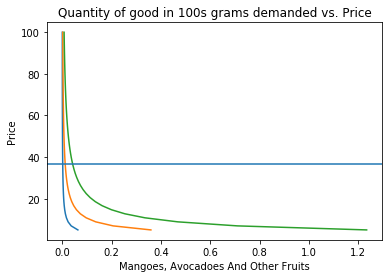

In [11]:
# Values for coconut prices
P = np.linspace(5,100,50) #Returns an array starting at 5 and going up to 100 with 50 identical distances separating the values.

def my_prices(p0,p=p):
    p.loc['Mangoes, Avocadoes And Other Fruits'] = p0
    return p

#Note that we are taking 5% of the 25th, 50th, and 75th percentile of daily food expenditures for households in Tanzania.
for x in [(3927.9419520547945*.05),(6311.8263698630135*.05),(9838.717294520548*.05)]:
    print('5% of budget', x*20, 'is:', x) #Assuming 5% of the total food budget is spent on this specific good.
    plt.plot([r.demands(x,my_prices(p0))['Mangoes, Avocadoes And Other Fruits'].values[0] for p0 in P],P)

plt.title('Quantity of good in 100s grams demanded vs. Price');
plt.xlabel('Mangoes, Avocadoes And Other Fruits');
plt.axhline(36.879) #Current market price of 100g of Mangoes, Avocadoes And Other Fruits
plt.ylabel('Price');

### Conclusion

In this notebook, we were able to use the CFEDemands function to understand how quantity demanded changes over household characteristics. Using a set of prices, we leveraged built in functions to calculate Marshallian Demands which we visualized by varying the prices of certain goods for different budgets. In future notebooks, we will explore how nutritional outcomes vary by the budget allocation.